[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/18bWyrg9-EJtmgRTdJblML1W2SGZrykAE/view?usp=sharing)

# Extracción de características

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['El cielo es azul','El sol es brillante y grande', 'El sol en el cielo es brillante', 'El sol brilla en el cielo azul']

#Instanciamos el objeto CountVectorizer() con parametros por defecto. Este objeto por defecto extrae todas las palabras
#del corpus, es decir, la bolsa de palabras y cuenta la frecuencia de aparición de cada una
count_vect = CountVectorizer()

#Ajustamos el vectorizador al corpus para generar la matriz término-documento
matrizBOW = count_vect.fit_transform(corpus)

#imprimimos la cantidad de filas y columnas de la matriz generada
print("La matriz tiene: ",matrizBOW.shape[0], "filas y ",matrizBOW.shape[1], " columnas")
print("")

#imprimimos la lista de palabras extraídas
print("El vocabulario del corpus es:")
print(count_vect.get_feature_names_out())
print("")

#visualizamos la matriz generada
print("Matriz término-documento")
print(matrizBOW.toarray())

La matriz tiene:  4 filas y  9  columnas

El vocabulario del corpus es:
['azul' 'brilla' 'brillante' 'cielo' 'el' 'en' 'es' 'grande' 'sol']

Matriz término-documento
[[1 0 0 1 1 0 1 0 0]
 [0 0 1 0 1 0 1 1 1]
 [0 0 1 1 2 1 1 0 1]
 [1 1 0 1 2 1 0 0 1]]


# N-gramas de palabras

In [ ]:
#instanciamos el objeto CountVectorizer() con el rango de n-gramas 1 a 2. Esto significa que el objeto buscará
#todos los n-gramas de longitud 1 (unigramas o palabras) y 2 (bigramas).
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b')

#Ajustamos el vectorizador al corpus para generar la matriz término-documento
matriz_bigramas = bigram_vectorizer.fit_transform(corpus)

#imprimimos la cantidad de filas y columnas de la matriz generada
print("La matriz tiene: ",matriz_bigramas.shape[0], "filas y ",matriz_bigramas.shape[1], " columnas")
print("")

#imprimimos la lista de bigramas extraídas
print("El vocabulario (bi-gramas) del corpus es:")
print(bigram_vectorizer.vocabulary_)
print("")

#visualizamos la matriz generada
print("Matriz término-documento")
print(matriz_bigramas.toarray())

La matriz tiene:  4 filas y  23  columnas

El vocabulario (bi-gramas) del corpus es:
{'el': 8, 'cielo': 5, 'es': 13, 'azul': 0, 'el cielo': 9, 'cielo es': 7, 'es azul': 14, 'sol': 17, 'brillante': 3, 'y': 21, 'grande': 16, 'el sol': 10, 'sol es': 20, 'es brillante': 15, 'brillante y': 4, 'y grande': 22, 'en': 11, 'sol en': 19, 'en el': 12, 'brilla': 1, 'sol brilla': 18, 'brilla en': 2, 'cielo azul': 6}

Matriz término-documento
[[1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1]
 [0 0 0 1 0 1 0 1 2 1 1 1 1 1 0 1 0 1 0 1 0 0 0]
 [1 1 1 0 0 1 1 0 2 1 1 1 1 0 0 0 0 1 1 0 0 0 0]]


# Tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#instanciamos el objeto TfidfVectorizer() con parametros por defecto, al igual que el CountVectorizer extraerá
#las palabras del corpus pero en lugar de contar la frecuencia, realizará el cálculo del TF-idf
tfidf_vect = TfidfVectorizer()

#Ajustamos el vectorizador al corpus para generar la matriz término-documento
matriz_tfidf=tfidf_vect.fit_transform(corpus)

#imprimimos la cantidad de filas y columnas de la matriz generada
print("La matriz tiene: ",matriz_tfidf.shape[0], "filas y ",matriz_tfidf.shape[1], " columnas")
print("")

#imprimimos la lista de bigramas extraídas
print("El vocabulario (bi-gramas) del corpus es:")
print(tfidf_vect.vocabulary_)
print("")

#visualizamos la matriz generada
print("Matriz término-documento")
print(matriz_tfidf.toarray())

La matriz tiene:  4 filas y  9  columnas

El vocabulario (bi-gramas) del corpus es:
{'el': 4, 'cielo': 3, 'es': 6, 'azul': 0, 'sol': 8, 'brillante': 2, 'grande': 7, 'en': 5, 'brilla': 1}

Matriz término-documento
[[0.60313701 0.         0.         0.48829139 0.39921021 0.
  0.48829139 0.         0.        ]
 [0.         0.         0.47903796 0.         0.31707032 0.
  0.38782252 0.60759891 0.38782252]
 [0.         0.         0.4181692  0.33854401 0.55356382 0.4181692
  0.33854401 0.         0.33854401]
 [0.38714286 0.49104163 0.         0.31342551 0.51249178 0.38714286
  0.         0.         0.31342551]]


# Similitud coseno

Para cada documento (el número de filas de la matriz), podemos calcular la similitud coseno entre el primer documento (*"El cielo es azul"*) con cada uno de los otros documentos del conjunto:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
sim_cosenoTF=cosine_similarity(matrizBOW[0:1], matrizBOW)
sim_cosenoTF_bigramas=cosine_similarity(matriz_bigramas[0:1], matriz_bigramas)
sim_cosenoTFIDF=cosine_similarity(matriz_tfidf[0:1], matriz_tfidf)
print(sim_cosenoTF)
print(sim_cosenoTF_bigramas)
print(sim_cosenoTFIDF)

[[1.         0.4472136  0.66666667 0.66666667]]
[[1.         0.22792115 0.58554004 0.48795004]]
[[1.         0.3159481  0.55160457 0.59113512]]


**Nota:** matrizBOW[0:1] es la operación de Scipy para obtener la primera fila de la matriz dispersa y la matriz resultante es la similitud de coseno entre el primer documento con todos los documentos del corpus. Tener en cuenta que el primer valor de la matriz es 1.0 porque es la similitud de coseno entre el primer documento consigo mismo. También tener en cuenta que debido a la presencia de palabras similares en el cuarto documento ("El sol brilla en el cielo azul"), logró una mejor puntuación utilizando la matriz TF-IDF.

# Análisis de Sentimientos en el corpus del TASS 2020

## Preparación de datos

In [1]:
#si usamos colab
from google.colab import drive

drive.mount('/content/gdrive')

#si falta instalar nltk
!pip install nltk

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

# Lectura del archivo donde se encuentran los datos de entrenamiento y validación
data = pd.read_csv('/content/gdrive/MyDrive/Meia2023/Modulo2-ClasificacionTextos/corpusTASS-2020/train.tsv', sep='\t')
data_dev = pd.read_csv('/content/gdrive/MyDrive/Meia2023/Modulo2-ClasificacionTextos/corpusTASS-2020/dev.tsv', sep='\t')

# Diccionario de mapeo de etiquetas
mapeo_etiquetas = {'N': 0, 'NEU': 1, 'P': 2}

# Transformación de la columna "etiqueta"
#data['etiqueta_num'] = data['etiqueta'].map(mapeo_etiquetas)
#data_dev['etiqueta_num'] = data_dev['etiqueta'].map(mapeo_etiquetas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# visualizar el dataset de entrenamiento
data

,id,texto,etiqueta,pais
0,768512386269638656,@morbosaborealis jajajaja... eso es verdad... ...,N,es
1,768529956162924544,@Adriansoler espero y deseo que el interior te...,NEU,es
2,768557093955698688,"comprendo que te molen mis tattoos, pero no te...",NEU,es
3,770616744192929792,"Mi última partida jugada, con Sona support. La...",P,es
4,769959690092642304,Tranquilos que con el.dinero de Camacho seguro...,P,es
...,...,...,...,...
4797,817849572865273857,@ladelbosque29 acude al próximo llamado que ha...,NEU,mx
4798,800007284491309060,@Dianybony jajajaja claro que no amor!! te amo...,P,mx
4799,817236774816718848,"Hoy le pedí a Dios una señal realmente obvia, ...",P,mx
4800,816175658250420224,El reboot de Jumanji puede romper mi corazón x...,N,mx


In [ ]:
# visualizar el dataset de validacion
data_dev

,id,texto,etiqueta,pais,etiqueta_num
0,773238965709176832,@chefidiaz no seas muy dura,N,es,0
1,770702799470489601,@lantoli podemos usar el término.equipo pepino,NEU,es,1
2,770238084764041217,Como destrozaba el puto movil ahora mismo,N,es,0
3,770222346829520896,@YG__GF me ofrecería pero gerald es demasiado ...,NEU,es,1
4,770560227531948032,@omixam no creo que hayan diseñado una tipo pr...,N,es,0
...,...,...,...,...,...
2438,819221868574085121,@Natsflorees no todo es tan malo,NEU,mx,1
2439,818686841381601280,"@Richo_Amezquita a ver, ya, no seas así",N,mx,0
2440,819012309880360960,ocupo el gym en serio #VideoMTV2016 Abraham Mateo,NEU,mx,1
2441,819306396378275840,Empezar de nuevo con la dieta es tan difícil,N,mx,0


### División de muestras en entrenamiento (train) y validación (dev)
En caso que no tengamos un dataset para validación, podemos dividir nuestro conjunto de entrenamiento en 2 subconjuntos. Tambien podemos hacer multiples divisiones para entrenar y validar el modelo en varias particiones del conjunto de entrenamiento. Abajo un ejemplo de como realizar la patición.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data['texto'],
                                                    data['etiqueta'],
                                                    random_state=0)
print(len(X_train))

3601


Para este ejemplo, utilizaremos las particiones de entrenamiento y validación ya definidas

In [ ]:
X_train, y_train = data['texto'], data['etiqueta']
X_test, y_test =data_dev['texto'], data_dev['etiqueta']

print('Tamaño del conjunto de entrenamiento:',len(X_train), len(y_train))
print('Tamaño del conjunto de validación:',len(X_test), len(y_test))
print(X_train)
print(y_train)

Tamaño del conjunto de entrenamiento: 4802 4802
Tamaño del conjunto de validación: 2443 2443
0       @morbosaborealis jajajaja... eso es verdad... ...
1       @Adriansoler espero y deseo que el interior te...
2       comprendo que te molen mis tattoos, pero no te...
3       Mi última partida jugada, con Sona support. La...
4       Tranquilos que con el.dinero de Camacho seguro...
                              ...                        
4797    @ladelbosque29 acude al próximo llamado que ha...
4798    @Dianybony jajajaja claro que no amor!! te amo...
4799    Hoy le pedí a Dios una señal realmente obvia, ...
4800    El reboot de Jumanji puede romper mi corazón x...
4801    @Djrossana que tengan un lindo martes y que to...
Name: texto, Length: 4802, dtype: object
0         N
1       NEU
2       NEU
3         P
4         P
       ... 
4797    NEU
4798      P
4799      P
4800      N
4801      P
Name: etiqueta, Length: 4802, dtype: object


¿Cuáles son los 20 tokens más frecuentes (únicos) en el texto? ¿Cuál es su frecuencia?

In [ ]:
from collections import Counter
def masFrecuentes():
    text = ' '.join(data['texto'])
    tokens=nltk.word_tokenize(text)
    cnt =Counter(tokens).most_common(20)
    return cnt

#print(' '.join(data['texto']))
masFrecuentes()

[('@', 3171), (',', 2642), ('que', 2458), ('de', 2456), ('y', 1845), ('a', 1578), ('.', 1512), ('la', 1454), ('no', 1441), ('!', 1352), ('me', 1238), ('el', 1198), ('en', 1163), ('es', 956), ('un', 772), ('lo', 706), ('mi', 658), ('por', 609), ('se', 600), ('con', 590)]


¿Qué porcentaje de los documentos en el conjunto de entrenamiento son positivos, negativos y neutros?

In [ ]:
data_neg=len(data[data['etiqueta'] == 'N'])
data_neu=len(data[data['etiqueta'] == 'NEU'])
data_pos=len(data[data['etiqueta'] == 'P'])
print ('Clase Negativa:',(data_neg)/len(data), '%')
print ('Clase Neutra:',(data_neu)/len(data), '%')
print ('Clase Positiva:', (data_pos)/len(data), '%')

Clase Negativa: 0.3925447730112453 %
Clase Neutra: 0.31715951686797167 %
Clase Positiva: 0.29029571012078303 %


¿Qué porcentaje de los documentos en el conjunto de prueba son positivos, negativos y neutros?

In [ ]:
data_dev_neg=len(data_dev[data_dev['etiqueta'] == 'N'])
data_dev_neu=len(data_dev[data_dev['etiqueta'] == 'NEU'])
data_dev_pos=len(data_dev[data_dev['etiqueta'] == 'P'])
print ('Clase Negativa:',(data_dev_neg)/len(data_dev), '%')
print ('Clase Neutra:',(data_dev_neu)/len(data_dev), '%')
print ('Clase Positiva:', (data_dev_pos)/len(data_dev), '%')

Clase Negativa: 0.3892754809660254 %
Clase Neutra: 0.32460090053213264 %
Clase Positiva: 0.286123618501842 %


## Clasificación de textos

Ajustar y transformar los datos de entrenamiento `X_train` utilizando un `count_vectorizer` con parámetros predeterminados.

Luego, ajustar un modelo de clasificación Naive Bayes multinomial. Calcular medidas de exactitud, presición, recall y f1-score usando los datos de validación transformados.

In [ ]:
# importamos librerías necesarias
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC #maquinas de vectores de soporte
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

vect = CountVectorizer().fit(X_train)
X_train_vectorized=vect.transform(X_train)
X_train_vectorized.shape
clf=MultinomialNB()
clf.fit(X_train_vectorized, y_train)

X_test_vectorized=vect.transform(X_test)
X_test_vectorized.shape

predictions = clf.predict(X_test_vectorized)
print(len(predictions))
print(predictions)

2443
['N' 'N' 'N' ... 'NEU' 'N' 'N']


In [ ]:
# podemos calcular las métricas por separado
scores=[]
scores.append(accuracy_score(y_test,predictions))
scores.append(precision_score(y_test,predictions, average='macro'))
scores.append(recall_score(y_test,predictions, average='macro'))
scores.append(f1_score(y_test,predictions, average='macro'))
print ('Métricas de clasificación',scores)
print ('----------------------------------------------------------------')
print ('Reporte de clasificación')
print ('----------------------------------------------------------------')
# podemos sacar un reporte de clasificación
target_names = ['negativo', 'neutro', 'positivo']
print(classification_report(y_test, predictions, target_names=target_names))
print ('----------------------------------------------------------------')
print ('Matriz de confusión')
print ('----------------------------------------------------------------')
# podemos sacar la matriz de confusión
matriz=confusion_matrix(y_test, predictions, labels=["N", "NEU", "P"])
print(matriz)

Métricas de clasificación [0.5313139582480557, 0.5391568854130901, 0.5091271676015149, 0.49443189040996677]
----------------------------------------------------------------
Reporte de clasificación
----------------------------------------------------------------
              precision    recall  f1-score   support

    negativo       0.51      0.82      0.63       951
      neutro       0.50      0.24      0.33       793
    positivo       0.61      0.46      0.52       699

    accuracy                           0.53      2443
   macro avg       0.54      0.51      0.49      2443
weighted avg       0.53      0.53      0.50      2443

----------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------
[[783  95  73]
 [465 193 135]
 [276 101 322]]


Graficamos la matriz de confusión

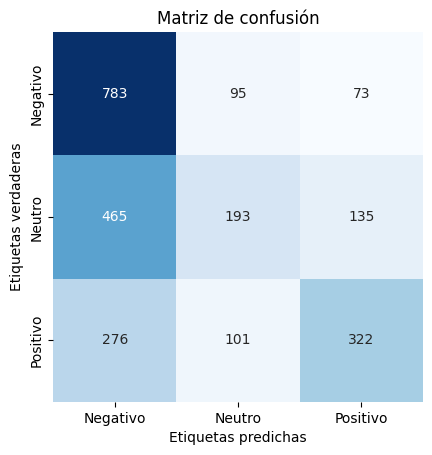

In [ ]:
# Crear figura y ejes
fig, ax = plt.subplots()
# Etiquetas personalizadas
etiquetas = ["Negativo", "Neutro", "Positivo"]

# Crear el heatmap de la matriz de confusión
sns.heatmap(matriz, annot=True, cmap='Blues', fmt='d', cbar=False, square=True, ax=ax)

# Configurar etiquetas de los ejes
ax.set_xticklabels(etiquetas)
ax.set_yticklabels(etiquetas)
ax.set_xlabel('Etiquetas predichas')
ax.set_ylabel('Etiquetas verdaderas')
ax.set_title('Matriz de confusión')

# Mostrar la figura
plt.show()

Ajustar y transformar los datos de entrenamiento `X_train` utilizando un `TfidfVectorizer` ignorando los términos que tienen una frecuencia de documento estrictamente inferior a **3**.

Luego, ajuste un modelo de clasificador Naive Bayes multinomial con suavizado (smoothing) `alfa = 0.1`.

In [ ]:
vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized=vect.transform(X_train)
clf=MultinomialNB(alpha=0.1)
clf.fit(X_train_vectorized, y_train)
predictions = clf.predict(vect.transform(X_test))

# podemos calcular las métricas por separado
scores=[]
scores.append(accuracy_score(y_test,predictions))
scores.append(precision_score(y_test,predictions, average='macro'))
scores.append(recall_score(y_test,predictions, average='macro'))
scores.append(f1_score(y_test,predictions, average='macro'))
print ('Métricas de clasificación',scores)
print ('----------------------------------------------------------------')
print ('Reporte de clasificación')
print ('----------------------------------------------------------------')
# podemos sacar un reporte de clasificación
target_names = ['negativo', 'neutro', 'positivo']
print(classification_report(y_test, predictions, target_names=target_names))
print ('----------------------------------------------------------------')
print ('Matriz de confusión')
print ('----------------------------------------------------------------')
# podemos sacar la matriz de confusión
matriz=confusion_matrix(y_test, predictions, labels=["N", "NEU", "P"])
print(matriz)

Métricas de clasificación [0.5186246418338109, 0.5165944904985541, 0.5052084180169478, 0.5040909162162478]
----------------------------------------------------------------
Reporte de clasificación
----------------------------------------------------------------
              precision    recall  f1-score   support

    negativo       0.53      0.69      0.60       951
      neutro       0.43      0.35      0.39       793
    positivo       0.58      0.47      0.52       699

    accuracy                           0.52      2443
   macro avg       0.52      0.51      0.50      2443
weighted avg       0.52      0.52      0.51      2443

----------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------
[[659 195  97]
 [377 278 138]
 [198 171 330]]


Ajustar y transformar los datos de entrenamiento `X_train` usando un `TfidfVectorizer` ignorando los términos que tienen una frecuencia de documento estrictamente inferior a **5**.

Usando esta matriz de término de documento, ajustar a un modelo de Clasificación de Vector de Soporte con regularización `C = 10000`.

In [ ]:
vect = TfidfVectorizer(min_df=5).fit(X_train)
X_train_vectorized=vect.transform(X_train)

model = SVC(C=10000, random_state=0)
model.fit(X_train_vectorized, y_train)

X_test_vectorized=vect.transform(X_test)
predictions = model.predict(X_test_vectorized)


# podemos calcular las métricas por separado
scores=[]
scores.append(accuracy_score(y_test,predictions))
scores.append(precision_score(y_test,predictions, average='macro'))
scores.append(recall_score(y_test,predictions, average='macro'))
scores.append(f1_score(y_test,predictions, average='macro'))
print ('Métricas de clasificación',scores)
print ('----------------------------------------------------------------')
print ('Reporte de clasificación')
print ('----------------------------------------------------------------')
# podemos sacar un reporte de clasificación
target_names = ['negativo', 'neutro', 'positivo']
print(classification_report(y_test, predictions, target_names=target_names))
print ('----------------------------------------------------------------')
print ('Matriz de confusión')
print ('----------------------------------------------------------------')
# podemos sacar la matriz de confusión
matriz=confusion_matrix(y_test, predictions, labels=["N", "NEU", "P"])
print(matriz)

Métricas de clasificación [0.5362259516987311, 0.5332567436863103, 0.5282380340820864, 0.5290248072753915]
----------------------------------------------------------------
Reporte de clasificación
----------------------------------------------------------------
              precision    recall  f1-score   support

    negativo       0.57      0.65      0.61       951
      neutro       0.45      0.41      0.43       793
    positivo       0.59      0.53      0.55       699

    accuracy                           0.54      2443
   macro avg       0.53      0.53      0.53      2443
weighted avg       0.53      0.54      0.53      2443

----------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------
[[618 225 108]
 [316 325 152]
 [154 178 367]]


Ajustar y transformar los datos de entrenamiento `X_train` usando un `TfidfVectorizer` ignorando los términos que tienen una frecuencia de documento estrictamente inferior a **2** y usando **n-gramas de palabras n = 1 a n = 3** (unigramas, bigramas y trigramas).

Usando esta matriz de término-documento, ajustar un modelo de Regresión logística con regularización `C = 1` y numero máximo de iteraciones `max_iter = 10000`.

También **encontramos los 10 coeficientes más pequeños y los 10 más grandes del modelo 0**

Listamos los 10 coeficientes más pequeños primero, listamos los 10 coeficientes más grandes despues.

In [ ]:
vect = TfidfVectorizer(min_df=2,ngram_range=(1,3)).fit(X_train)
X_train_vectorized=vect.transform(X_train)

model = LogisticRegression(C=1,multi_class='ovr',max_iter=10000)
model.fit(X_train_vectorized, y_train)

X_test_vectorized=vect.transform(X_test)

predictions = model.predict(X_test_vectorized)

feature_names = np.array(vect.get_feature_names_out())

#inspeccionamos el modelo para la clasificación Negativa vs otras
sorted_coef_index = model.coef_[0].argsort()
print (list(feature_names[sorted_coef_index[:10]]))
print (list(feature_names[sorted_coef_index[:-11:-1]]))


# podemos calcular las métricas por separado
scores=[]
scores.append(accuracy_score(y_test,predictions))
scores.append(precision_score(y_test,predictions, average='macro'))
scores.append(recall_score(y_test,predictions, average='macro'))
scores.append(f1_score(y_test,predictions, average='macro'))
print ('Métricas de clasificación',scores)
print ('----------------------------------------------------------------')
print ('Reporte de clasificación')
print ('----------------------------------------------------------------')
# podemos sacar un reporte de clasificación
target_names = ['negativo', 'neutro', 'positivo']
print(classification_report(y_test, predictions, target_names=target_names))
print ('----------------------------------------------------------------')
print ('Matriz de confusión')
print ('----------------------------------------------------------------')
# podemos sacar la matriz de confusión
matriz=confusion_matrix(y_test, predictions, labels=["N", "NEU", "P"])
print(matriz)

['gracias', 'feliz', 'buena', 'bueno', 'amo', 'buen', 'buenos', 'lindo', 'bien', 'bonito']
['triste', 'no', 'me', 'feo', 'peor', 'odio', 'extraño', 'que', 'mal', 'ni']
Métricas de clasificación [0.5587392550143266, 0.5626812136282359, 0.5423947489366783, 0.5393975522359372]
----------------------------------------------------------------
Reporte de clasificación
----------------------------------------------------------------
              precision    recall  f1-score   support

    negativo       0.55      0.77      0.64       951
      neutro       0.50      0.35      0.41       793
    positivo       0.64      0.51      0.56       699

    accuracy                           0.56      2443
   macro avg       0.56      0.54      0.54      2443
weighted avg       0.56      0.56      0.55      2443

----------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------
[[735 144  72]
 [390 277 126]
 [209 137

Ajustar y transformar los datos de entrenamiento `X_train` usando un `CountVectorizer` ignorando los términos que tienen una frecuencia de documento estrictamente inferior a **2** y utilizando **caracteres n-grams desde n = 2 a n = 5.**

Para decirle a `CountVectorizer` que use caracteres n-grams, pase en `analyzer = 'char_wb'` que crea caracteres n-gramas solo del texto dentro de los límites de las palabras. Esto debería hacer que el modelo sea más robusto a los errores ortográficos.

Ajustar un modelo de Regresión logística con regularización `C = 1`. Luego calcule el área bajo de la curva (AUC) usando los datos de prueba transformados.

In [ ]:
vect = CountVectorizer(min_df=3,analyzer='char_wb', ngram_range=(2,5)).fit(X_train)
X_train_vectorized=vect.transform(X_train)

model = LogisticRegression(C=1,multi_class='ovr',max_iter=10000)
model.fit(X_train_vectorized, y_train)

X_test_vectorized=vect.transform(X_test)

predictions = model.predict(X_test_vectorized)

# podemos calcular las métricas por separado
scores=[]
scores.append(accuracy_score(y_test,predictions))
scores.append(precision_score(y_test,predictions, average='macro'))
scores.append(recall_score(y_test,predictions, average='macro'))
scores.append(f1_score(y_test,predictions, average='macro'))
print ('Métricas de clasificación',scores)
print ('----------------------------------------------------------------')
print ('Reporte de clasificación')
print ('----------------------------------------------------------------')
# podemos sacar un reporte de clasificación
target_names = ['negativo', 'neutro', 'positivo']
print(classification_report(y_test, predictions, target_names=target_names))
print ('----------------------------------------------------------------')
print ('Matriz de confusión')
print ('----------------------------------------------------------------')
# podemos sacar la matriz de confusión
matriz=confusion_matrix(y_test, predictions, labels=["N", "NEU", "P"])
print(matriz)

Métricas de clasificación [0.5276299631600491, 0.5216352947019709, 0.5234478484295765, 0.5223779971877317]
----------------------------------------------------------------
Reporte de clasificación
----------------------------------------------------------------
              precision    recall  f1-score   support

    negativo       0.59      0.61      0.60       951
      neutro       0.43      0.41      0.42       793
    positivo       0.55      0.56      0.55       699

    accuracy                           0.53      2443
   macro avg       0.52      0.52      0.52      2443
weighted avg       0.53      0.53      0.53      2443

----------------------------------------------------------------
Matriz de confusión
----------------------------------------------------------------
[[578 249 124]
 [272 322 199]
 [130 180 389]]


## Clasificación usando vectores de palabras (pre-entrenados)

In [ ]:
!pip install gensim


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
wv_from_text = KeyedVectors.load_word2vec_format(datapath('/content/gdrive/MyDrive/Meia2023/Modulo2-ClasificacionTextos/cc.es.300.vec'), binary=False)  # C text format


In [ ]:
#Construimos vectores para cada documento del conjunto de entrenamiento usando los valores promedios de todos los vectores de palabra del tweet
def buildWordVectorKeyed(model, text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    oov=0
    for word in nltk.word_tokenize(text):
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            oov+= 1
            continue
    if count != 0:
        vec /= count
        #print('oov',oov)
    return vec

In [ ]:
from sklearn.preprocessing import scale
n_dim = 300
train_vecs = np.concatenate([buildWordVectorKeyed(wv_from_text,z, n_dim) for z in X_train])
train_vecs = scale(train_vecs)
test_vecs = np.concatenate([buildWordVectorKeyed(wv_from_text,z, n_dim) for z in X_test])
test_vecs = scale(test_vecs)

In [ ]:
#Usamos el algoritmo de Logistic Regression en el conjunto de prueba,
#luego evaluamos el rendimiento del modelo en el conjunto de prueba
lr = LogisticRegression(C=1,multi_class='ovr',max_iter=10000)
lr.fit(train_vecs, y_train)
print ('Accuracy: %.2f'%lr.score(test_vecs, y_test))

Accuracy: 0.58
